In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


## All features

In [2]:
df = pd.read_csv('./data/diabetes_data.csv')
df['gender'] = df['gender'].replace({'Male':0, 'Female':1})

In [3]:
X_train, X_test, y_train, y_test = utils.split_data(df)

In [4]:
df_all = utils.apply_classifiers(X_train, y_train, X_test, y_test)
df_all['#features'] = 16
df_all['method'] = 'All features'
df_all

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.865,0.889,0.865,0.869,0.959,KNeighborsClassifier,16,All features
1,0.894,0.895,0.894,0.895,0.961,SVC,16,All features
2,0.904,0.904,0.904,0.904,0.967,MLPClassifier,16,All features
3,0.962,0.966,0.962,0.962,0.972,DecisionTreeClassifier,16,All features


In [5]:
utils.df_to_tex(df_all)

\begin{tabular}{llrrrrrrl}
\toprule
 & Model & accuracy & precision & recall & f1_score & roc_auc & #features & method \\
\midrule
0 & KNeighborsClassifier & 0.86 & 0.89 & 0.86 & 0.87 & 0.96 & 16 & All features \\
1 & SVC & 0.89 & 0.90 & 0.89 & 0.90 & 0.96 & 16 & All features \\
2 & MLPClassifier & 0.90 & 0.90 & 0.90 & 0.90 & 0.97 & 16 & All features \\
3 & DecisionTreeClassifier & 0.96 & 0.97 & 0.96 & 0.96 & 0.97 & 16 & All features \\
\bottomrule
\end{tabular}



## Univariate filtered subset selection

In [21]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

df_univar = pd.DataFrame()
for k in range(1,17): 
    
    print(f'Using {k} best features...........')
    X = df.drop(columns=['class'])
    y = df['class']
    
    selector = SelectKBest(chi2, k=k).fit(X, y)
    X_new = selector.transform(X)
    selected_feature_names = X.columns[selector.get_support()].tolist()
    print(selected_feature_names)
    
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    df_univ_k = utils.apply_classifiers(X_train, y_train, X_test, y_test)
    
    df_univ_k['#features'] = k
    df_univar = pd.concat([df_univar, df_univ_k], axis=0)
    print()

Using 1 best features...........
['polydipsia']

Using 2 best features...........
['polyuria', 'polydipsia']

Using 3 best features...........
['gender', 'polyuria', 'polydipsia']

Using 4 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss']

Using 5 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'partial_paresis']

Using 6 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'irritability', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 7 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'irritability', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 8 best features...........
['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 9 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 10 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'visual_blurring', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 11 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'visual_blurring', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 12 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'alopecia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 13 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'muscle_stiffness', 'alopecia']

Using 14 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 15 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Using 16 best features...........
['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']



/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
df_univar['method'] = 'Univariate'
df_univar

,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.798,0.854,0.798,0.805,0.836,KNeighborsClassifier,1,Univariate
1,0.798,0.854,0.798,0.805,0.836,SVC,1,Univariate
2,0.798,0.854,0.798,0.805,0.836,MLPClassifier,1,Univariate
3,0.798,0.854,0.798,0.805,0.836,DecisionTreeClassifier,1,Univariate
0,0.865,0.872,0.865,0.867,0.905,KNeighborsClassifier,2,Univariate
...,...,...,...,...,...,...,...,...
3,0.942,0.951,0.942,0.943,0.958,DecisionTreeClassifier,15,Univariate
0,0.865,0.889,0.865,0.869,0.959,KNeighborsClassifier,16,Univariate
1,0.894,0.895,0.894,0.895,0.961,SVC,16,Univariate
2,0.904,0.904,0.904,0.904,0.967,MLPClassifier,16,Univariate


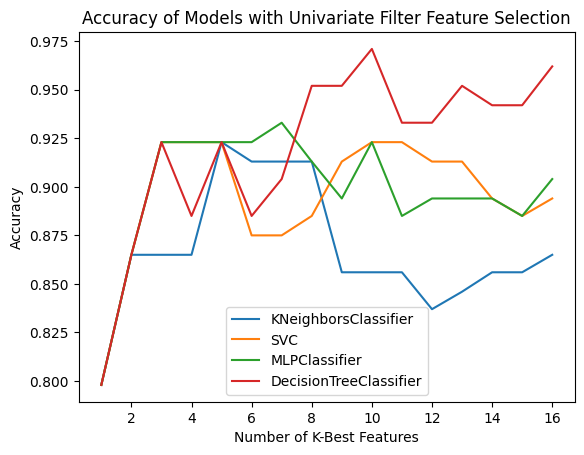

In [8]:
for model in df_univar['Model'].unique():
    df_model = df_univar[df_univar['Model'] == model]
    plt.plot(df_model['#features'], df_model['accuracy'], label=model, )

plt.legend()    
plt.title('Accuracy of Models with Univariate Filter Feature Selection')
plt.xlabel('Number of K-Best Features')
plt.ylabel("Accuracy")
plt.savefig('./img/all-features-kbest.png')
plt.show()

## Multivariate filtered subset selection

In [9]:
from skrebate import ReliefF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from ReliefF import ReliefF

df = pd.read_csv("./data/diabetes_data.csv")  # Load your actual data
df = utils.clean_data(df)
X_train, X_test, y_train, y_test = utils.split_data(df)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(416, 16)
(104, 16)
(416,)
(104,)


In [10]:
fs = ReliefF()
# fs = ReliefF(n_features_to_keep=7) # to change the number of features in the subset
X_train_relief = fs.fit_transform(X_train.values, y_train.values)

importance = fs.feature_scores
sorted_indices = np.argsort(importance)[::-1] 
top_feature_indices = sorted_indices[:X_train_relief.shape[1]]  

selected_feature_names = X_train.columns[top_feature_indices].tolist()

print("Selected features:", selected_feature_names)
print(X_train_relief)
print("--------------")
print("(No. of tuples, No. of Columns before ReliefF) : "+str(X_train.shape)+
      "\n(No. of tuples , No. of Columns after ReliefF) : "+str(X_train_relief.shape))

Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness']
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 0 1 0]]
--------------
(No. of tuples, No. of Columns before ReliefF) : (416, 16)
(No. of tuples , No. of Columns after ReliefF) : (416, 10)


In [11]:
df_multivar = pd.DataFrame()
for k in range(1,17): 
    print(f'Using {k} best features...........')
    X = df.drop(columns=['class'])
    y = df['class']
    fs = ReliefF(n_features_to_keep=k)
    X_train, X_test, y_train, y_test = utils.split_data(df)
    X_train_relief = fs.fit_transform(X_train.values, y_train.values)
    X_test_relief = fs.transform(X_test.values) 
    importance = fs.feature_scores
    sorted_indices = np.argsort(importance)[::-1] 
    top_feature_indices = sorted_indices[:X_train_relief.shape[1]]  
    selected_feature_names = X_train.columns[top_feature_indices].tolist()
    print("Selected features:", selected_feature_names)
    df_multivar_k = utils.apply_classifiers(X_train_relief, y_train, X_test_relief, y_test)
    df_multivar_k['#features'] = k
    df_multivar = pd.concat([df_multivar, df_multivar_k], axis=0)

Using 1 best features...........
Selected features: ['polyuria']
Using 2 best features...........
Selected features: ['polyuria', 'polydipsia']
Using 3 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss']
Using 4 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia']
Using 5 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 6 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 7 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 8 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 9 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 10 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 11 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 12 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 13 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 14 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity', 'itching']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 15 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity', 'itching', 'genital_thrush']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Using 16 best features...........
Selected features: ['polyuria', 'polydipsia', 'sudden_weight_loss', 'alopecia', 'gender', 'partial_paresis', 'muscle_stiffness', 'polyphagia', 'visual_blurring', 'weakness', 'delayed_healing', 'irritability', 'obesity', 'itching', 'genital_thrush', 'age']


/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
df_multivar['method'] = 'Multivariate. RelieF'
df_multivar

,accuracy,precision,recall,f1_score,roc_auc,Model,#features,method
0,0.798,0.844,0.798,0.805,0.828,KNeighborsClassifier,1,Multivariate. RelieF
1,0.798,0.844,0.798,0.805,0.828,SVC,1,Multivariate. RelieF
2,0.798,0.844,0.798,0.805,0.828,MLPClassifier,1,Multivariate. RelieF
3,0.798,0.844,0.798,0.805,0.828,DecisionTreeClassifier,1,Multivariate. RelieF
0,0.865,0.872,0.865,0.867,0.905,KNeighborsClassifier,2,Multivariate. RelieF
...,...,...,...,...,...,...,...,...
3,0.962,0.963,0.962,0.962,0.978,DecisionTreeClassifier,15,Multivariate. RelieF
0,0.865,0.889,0.865,0.869,0.959,KNeighborsClassifier,16,Multivariate. RelieF
1,0.894,0.895,0.894,0.895,0.961,SVC,16,Multivariate. RelieF
2,0.904,0.904,0.904,0.904,0.965,MLPClassifier,16,Multivariate. RelieF


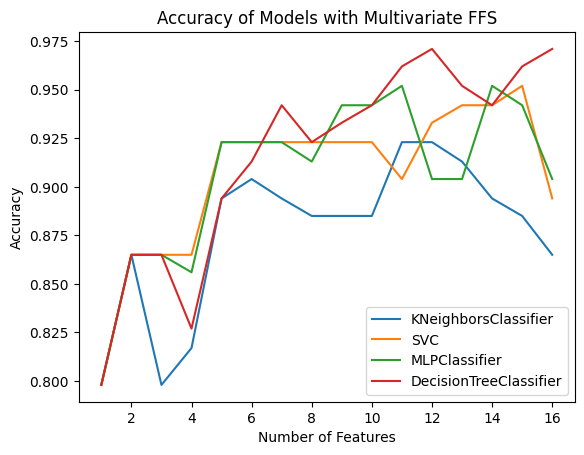

In [13]:
for model in df_multivar['Model'].unique():
    df_model = df_multivar[df_multivar['Model'] == model]
    plt.plot(df_model['#features'], df_model['accuracy'], label=model)

plt.legend()    
plt.title('Accuracy of Models with Multivariate FFS')
plt.xlabel('Number of Features')
plt.ylabel("Accuracy")
plt.savefig('./img/multivariate-kvalues.png')
plt.show()

## Wrapper method

In [14]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
sfs = SequentialFeatureSelector(knn)
sfs.fit(X_train, y_train)
sfs.get_support()
X_train_wrapper = sfs.transform(X_train)
X_test_wrapper = sfs.transform(X_test)
features_wrapper = sfs.get_feature_names_out()
print(f'Obtained {len(features_wrapper)} features: {features_wrapper}')

Obtained 8 features: ['gender' 'polyuria' 'polydipsia' 'sudden_weight_loss' 'itching'
 'delayed_healing' 'alopecia' 'obesity']


In [15]:
df_wrapper = utils.apply_classifiers(X_train_wrapper, y_train, X_test_wrapper, y_test)
df_wrapper['#features'] = len(X_train_wrapper[0])
df_wrapper['method'] = 'Wrapper. SFS'

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
results_all = pd.concat([df_all, df_univar, df_multivar, df_wrapper] )
results_all = results_all[['method','#features','Model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']]
results_all

,method,#features,Model,accuracy,precision,recall,f1_score,roc_auc
0,All features,16,KNeighborsClassifier,0.865,0.889,0.865,0.869,0.959
1,All features,16,SVC,0.894,0.895,0.894,0.895,0.961
2,All features,16,MLPClassifier,0.904,0.904,0.904,0.904,0.967
3,All features,16,DecisionTreeClassifier,0.962,0.966,0.962,0.962,0.972
0,Univariate,1,KNeighborsClassifier,0.798,0.854,0.798,0.805,0.836
...,...,...,...,...,...,...,...,...
3,Multivariate. RelieF,16,DecisionTreeClassifier,0.971,0.972,0.971,0.971,0.971
0,Wrapper. SFS,8,KNeighborsClassifier,0.933,0.933,0.933,0.933,0.969
1,Wrapper. SFS,8,SVC,0.942,0.947,0.942,0.941,0.975
2,Wrapper. SFS,8,MLPClassifier,0.952,0.952,0.952,0.952,0.994


In [32]:
results_all.sort_values(by='accuracy', ascending=False)

,method,#features,Model,accuracy,precision,recall,f1_score,roc_auc
3,Multivariate. RelieF,12,DecisionTreeClassifier,0.971,0.971,0.971,0.971,0.976
3,Multivariate. RelieF,16,DecisionTreeClassifier,0.971,0.972,0.971,0.971,0.971
3,Univariate,10,DecisionTreeClassifier,0.971,0.974,0.971,0.971,0.979
3,All features,16,DecisionTreeClassifier,0.962,0.966,0.962,0.962,0.972
3,Multivariate. RelieF,11,DecisionTreeClassifier,0.962,0.963,0.962,0.962,0.976
...,...,...,...,...,...,...,...,...
3,Univariate,1,DecisionTreeClassifier,0.798,0.854,0.798,0.805,0.836
2,Univariate,1,MLPClassifier,0.798,0.854,0.798,0.805,0.836
1,Univariate,1,SVC,0.798,0.854,0.798,0.805,0.836
0,Univariate,1,KNeighborsClassifier,0.798,0.854,0.798,0.805,0.836
